<a href="https://colab.research.google.com/github/TalhaAkbar-TK/Models-from-Scratch/blob/main/Linear_Regression_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using linear regresssion model
Work flow of the Linear Regression model:
                                      
* Step 1: Set Learning Rate & Number of Iterations; Initiate Random 
weight and bias value.
* Step 2: Build Linear Regression Equation. (у . WX + b)
* Step 3: Find the "y pred" value for given x value for the corresponding weight & bias.
* Step 4: Check the loss function for these parameter values. ( ( difference between "y pred" & "true y")
* Step 5: Update the parameter values using Gradient Descent. (new weight & bias value)
* Step 6: Step 3, 4, 5 are repeated till we get minimum loss function.
* Finally we will get the best model (best weight and bias value) as it has minimum loss function.

In [ ]:
import numpy as np

Linear Regression

In [ ]:
class Linear_Regression:
  # initiating the parameters (learning rate & no. of iterations)
  def __init__(self,learning_rate, no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  def fit(self,X,Y):
    # number of training(data point) eaxample & number of feature
    # m=no of data point & n =no of feature
    self.m,self.n = X.shape # number of rows and columns
    # initiating the weight anf bias
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X 
    self.Y = Y
    # implementing Gradient Descent 
    for i in range(self.no_of_iterations):
      self.update_weights()
   
        
  def update_weights(self):
    Y_prediction =self.predict(self.X)
     # caculate gradients
    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction )) / self.m
    db = - 2 * np.sum(self.Y - Y_prediction) / self.m
    # upadating the weights
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db


  def predict(self,X):
    return X.dot(self.w) + self.b

In [ ]:
# importing the dependencies 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Data Pre-Processing

In [ ]:
# loading the data from csv file to a pandas dataframe
salary_data =pd.read_csv('/content/drive/MyDrive/Machine Learning/salary_data.csv')

In [ ]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [ ]:
salary_data.shape

(30, 2)

In [ ]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Splitting the feature & target

In [ ]:
X =salary_data.iloc[:,:-1].values 
Y = salary_data.iloc[:,1].values

Splitting the dataset into training & testing

In [ ]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.33,random_state=2)

Training the Linear Regreesion

In [ ]:
model = Linear_Regression(learning_rate=0.02, no_of_iterations=1000)

In [ ]:
model.fit(X_train,Y_train)

In [ ]:
print('weight =',model.w[0])
print('bias = ',model.b)

weight = 9514.400999035135
bias 23697.406507136307


Predict the salary value for test data 
 

In [ ]:
test_data_prediction = model.predict(X_test)

In [ ]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


Visualizing the predicted valeus & actual values

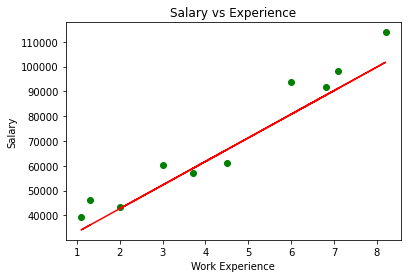

In [ ]:
plt.scatter(X_test,Y_test, color = 'green')
plt.plot(X_test,test_data_prediction,color='red')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()